<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Análise-dos-dados-eólicos-da-estação-82990-(Pão-de-Açúcar,-Alagoas)" data-toc-modified-id="Análise-dos-dados-eólicos-da-estação-82990-(Pão-de-Açúcar,-Alagoas)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Análise dos dados eólicos da estação 82990 (Pão de Açúcar, Alagoas)</a></span><ul class="toc-item"><li><span><a href="#Análises-estatísticas" data-toc-modified-id="Análises-estatísticas-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Análises estatísticas</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Distribuição" data-toc-modified-id="Distribuição-1.1.0.1"><span class="toc-item-num">1.1.0.1&nbsp;&nbsp;</span>Distribuição</a></span></li></ul></li></ul></li><li><span><a href="#Considerando-um-ano-estatístico-(médias-mensais)" data-toc-modified-id="Considerando-um-ano-estatístico-(médias-mensais)-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Considerando um ano estatístico (médias mensais)</a></span></li></ul></li><li><span><a href="#Extrapolação-do-vento" data-toc-modified-id="Extrapolação-do-vento-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Extrapolação do vento</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Coeficiente-de-rugosidade" data-toc-modified-id="Coeficiente-de-rugosidade-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Coeficiente de rugosidade</a></span></li><li><span><a href="#Lei-logarítmica" data-toc-modified-id="Lei-logarítmica-2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span>Lei logarítmica</a></span></li></ul></li></ul></li><li><span><a href="#Potencial" data-toc-modified-id="Potencial-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Potencial</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Densidade-de-potencial-eólico" data-toc-modified-id="Densidade-de-potencial-eólico-3.0.1"><span class="toc-item-num">3.0.1&nbsp;&nbsp;</span>Densidade de potencial eólico</a></span></li></ul></li><li><span><a href="#Distribuições-para-a-altura-a-ser-utilizada" data-toc-modified-id="Distribuições-para-a-altura-a-ser-utilizada-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Distribuições para a altura a ser utilizada</a></span></li></ul></li></ul></div>

In [1]:
from scipy import stats
from scipy.stats import weibull_max

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.offline as pyo
import plotly.graph_objs as go
pyo.init_notebook_mode(connected=True)

# Análise dos dados eólicos da estação 82990 (Pão de Açúcar, Alagoas)

In [3]:
df = pd.read_csv('paodeacucar_semHeader.csv', sep=';').drop(['Unnamed: 4', 'Hora','Estacao'], 1)
df.columns = ['data','vel_m']
df['data'] = pd.to_datetime(df['data'], dayfirst=True)

df['month'] = df['data'].dt.month
df['year'] = df['data'].dt.year

In [4]:
trace = go.Scatter(x = df['data'], y = df['vel_m'])
layout = go.Layout(title = 'Todos os dados (verificando integridade da base)',
                   yaxis= dict(title = 'Velocidade média do vento (m/s)'))
pyo.iplot(go.Figure(data = [trace], layout = layout), config=dict(showLink = False))

Serão utilizados os dados a partir de novembro de 2001 para a análise. O resto ta bem esquisito.

In [4]:
df = df[df['data'] > '2001-11-01']

In [6]:
trace = go.Scatter(x = df['data'], y = df['vel_m'])
layout = go.Layout(title = 'Medições da velocidade do vento',
                   yaxis= dict(title = 'Velocidade média do vento (m/s)'))
pyo.iplot(go.Figure(data = [trace], layout = layout), filename = 'dados_crus.html' , config=dict(showLink = False))

Existem alguns dados vazios, mas como estamos lidando com distribuição, não será necessário todos os dados.

## Análises estatísticas

In [7]:
x = ['Janeiro',
 'Fevereiro',
 'Março',
 'Abril',
 'Maio',
 'Junho',
 'Julho',
 'Agosto',
 'Setembro',
 'Outubro',
 'Novembro',
 'Dezembro']

In [8]:
data = []
for mes in np.arange(1,13,1):
    data.append(go.Box(y = df[df['month'] == mes]['vel_m'], name = x[mes-1]))

layout = go.Layout(title = 'Boxplot mensal da velocidade do vento', showlegend = False,
                   yaxis = dict(title = 'Velocidade do vento (m/s)'))

fig = go.Figure(data = data, layout = layout)

pyo.iplot(fig, filename = 'boxplot_mensal,html', config=dict(showLink=False))

In [9]:
data = []
for ano in np.unique(df.year):
    data.append(go.Box(y = df[df['year'] == ano]['vel_m'], name = str(ano)))

layout = go.Layout(title = 'Boxplot anual da velocidade do vento', showlegend = False,
                   yaxis = dict(title = 'Velocidade do vento (m/s)'))

fig = go.Figure(data = data, layout = layout)

pyo.iplot(fig, filename = 'boxplot_anual.html', config=dict(showLink=False))

#### Distribuição

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



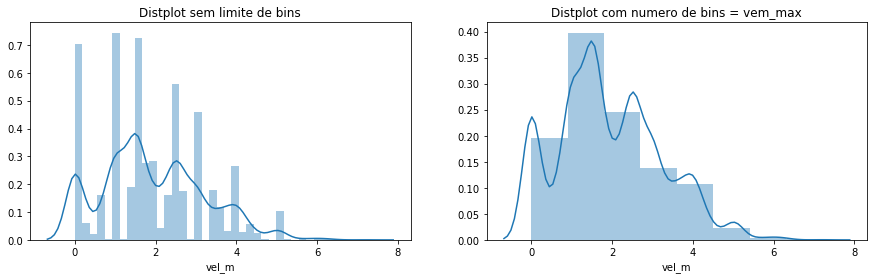

In [10]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize = (15,4))
sns.distplot(df['vel_m'], ax = ax1)#,bins = 8)
ax1.set_title('Distplot sem limite de bins')

sns.distplot(df['vel_m'], ax = ax2,bins = 8)
ax2.set_title('Distplot com numero de bins = vem_max')
plt.show()

- Ajustando á distribuição de weibull

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1037: RuntimeWarning:

invalid value encountered in subtract

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:2305: RuntimeWarning:

invalid value encountered in double_scalars



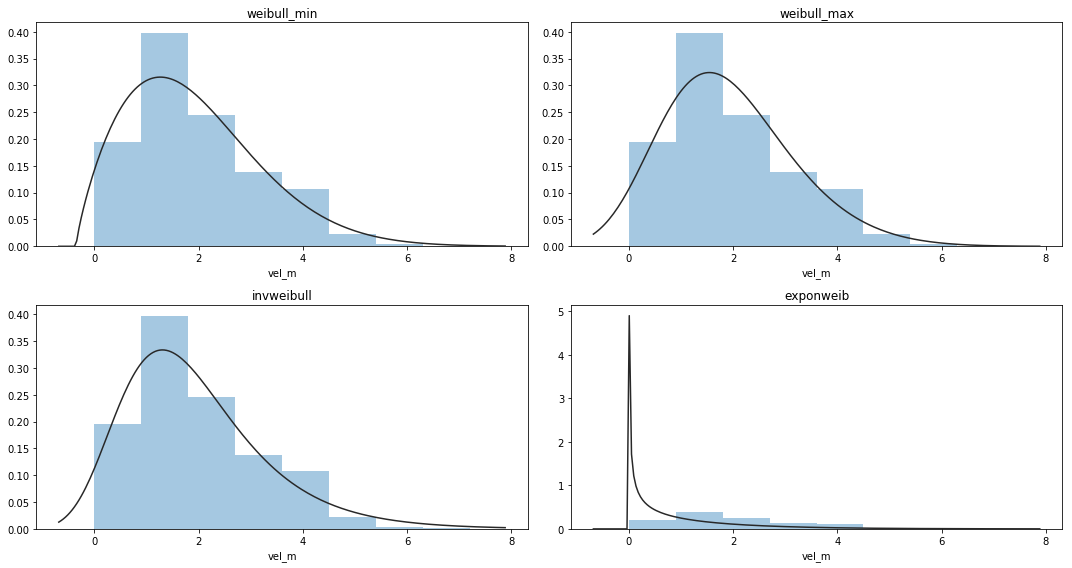

In [11]:
fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2,2,figsize = (15,8))
sns.distplot(df['vel_m'], fit=stats.weibull_min, kde=False, bins = 8, ax = ax1)
ax1.set_title('weibull_min')
sns.distplot(df['vel_m'], fit=stats.weibull_max, kde=False, bins = 8, ax = ax2)
ax2.set_title('weibull_max')
sns.distplot(df['vel_m'], fit=stats.invweibull, kde=False, bins = 8, ax = ax3)
ax3.set_title('invweibull')
sns.distplot(df['vel_m'], fit=stats.exponweib, kde=False, bins = 8, ax = ax4)
ax4.set_title('exponweib')
plt.tight_layout()

O melhor fit parece ser weibull_max

In [12]:
shape, loc, scale = stats.weibull_max.fit(df['vel_m'])

In [13]:
stats.weibull_max.fit(df['vel_m'])

(7.675819688635327, 10.176303650339708, 8.790439888769836)

In [14]:
sample = stats.weibull_max.rvs(c=shape, scale=scale, loc=loc, size=250)

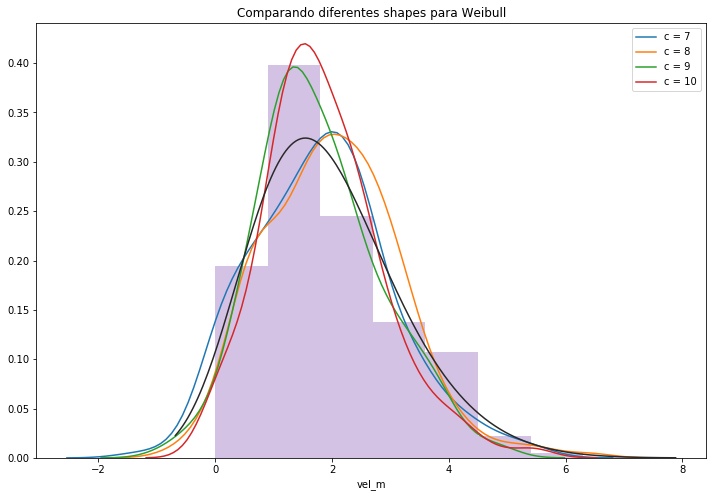

In [15]:
fig, ax = plt.subplots(figsize = (12,8))
for c in [7,8,9,10]:
    sample = stats.weibull_max.rvs(c=c, scale=scale, loc=loc, size=250)
    sns.distplot(sample, ax = ax, hist=False, label='c = '+str(c))
sns.distplot(df['vel_m'], fit = stats.weibull_max, kde=False, bins = 8, ax = ax, label  = str(shape))
ax.set_title('Comparando diferentes shapes para Weibull')
plt.show()

## Considerando um ano estatístico (médias mensais)

In [16]:
df_stat = df.dropna().copy()
df_stat = df_stat.groupby(['month'], as_index=False).mean().drop('year',1)

df_stat.columns = ['month','vel_10m']

In [17]:
trace = go.Scatter(x = x, y = df_stat['vel_10m'])
layout = go.Layout(title = 'Médias mensais da velocidade do vento a 10m',
                   yaxis = dict(title = 'Velocidade média do vento (m/s)'))
pyo.iplot(go.Figure(data = [trace], layout = layout), filename  = 'medias_mensais.html', config=dict(showLink = False))

# Extrapolação do vento

### Coeficiente de rugosidade
| Terreno | z_o|
|--------------|----|
| Cidades, Florestas | 0.7 |
| Subúrbios | 0.3 |
| Vilarejos | 0.1 |
| Poucas arvores | 0.03 |
| Planicies gramadas | 0.01 |
| Deserto plano | 0.001 |


### Lei logarítmica

$$v(h) = v_{ref} \frac{ln(h/z_o)}{ln(h_{ref}/z_o)}$$

onde $h_{ref}$ representa a altura de referência da medida da velocidade, $v_{ref}$ a velocidade
nesta altura de referência e $z_o$ é o comprimento de rugosidade.
http://www.sbmet.org.br/cbmet2010/artigos/474_65917.pdf






$$z_o = 0,1$$

In [18]:
def lei_log(v_ref,h,z_o = 0.1,h_ref = 10):
    return v_ref*(np.log(h/z_o)/np.log(h_ref/z_o))

Considerando um coeficiente de rugosidade de um vilarejo (0.1)

In [19]:
df_extra = df_stat.copy()
for v in [20,30,40,50,60,70,80,100,110,120]:
    df_extra['vel_'+str(v)+'m'] = lei_log(df_extra['vel_10m'], h=v)

In [20]:
data = []
for col in df_extra.drop('month',1).columns:
    trace = go.Scatter(x = x, y = df_extra[col], name = col, mode = 'lines')
    data.append(trace)
    
layout = go.Layout(title = 'Velocidades em diversas alturas',
                   yaxis = dict(title = 'Velocidade do vento (m/s)'))
fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig, filename = 'velocidades_alturas.html' , config=dict(showLink = False))

# Potencial

### Densidade de potencial eólico
$$ \frac{P_{eol}}{A} =  \rho \cdot \frac{v^3}{2}$$
Onde $\rho$ é a densidade do ar no Local. Padrão = 1.225

In [21]:
def potEolico(v, rho=1.225):
    return rho/2 * v**3

In [22]:
df_pot = pd.DataFrame()
df_pot['month'] = df_extra['month']
for col in df_extra.columns[1:]:
    name = 'pot'+col[3:]
    df_pot[name] = potEolico(df_extra[col])

In [23]:
data = []
for col in df_pot.drop('month',1).columns:
    trace = go.Scatter(x = x, y = df_pot[col], name = col, mode = 'lines')
    data.append(trace)
    
layout = go.Layout(title = 'Potenciais eólicos por área em diversas alturas',
                   yaxis = dict(title = 'Potencial sobre area (W/m^2)'))
fig = go.Figure(data = data, layout = layout)
pyo.iplot(fig, filename = 'potenciais_alturas.html', config=dict(showLink = False))

## Distribuições para a altura a ser utilizada

Isso será feito para descobrir qual será a velocidade mais frequente: a qual o aerogerador será escolhido.

In [36]:
import warnings
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels as sm
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12.0, 8.0)
matplotlib.style.use('ggplot')

# Create models from data
def best_fit_distribution(data, bins=8, ax=None):
    """Model data by finding best fit distribution to data"""
    # Get histogram of original data
    y, x = np.histogram(data, bins=bins, density=True)
    x = (x + np.roll(x, -1))[:-1] / 2.0

    # Distributions to check
    DISTRIBUTIONS = [        
        st.alpha,st.anglit,st.arcsine,st.beta,st.betaprime,st.bradford,st.burr,st.cauchy,st.chi,st.chi2,st.cosine,
        st.dgamma,st.dweibull,st.erlang,st.expon,st.exponnorm,st.exponweib,st.exponpow,st.f,st.fatiguelife,st.fisk,
        st.foldcauchy,st.foldnorm,st.frechet_r,st.frechet_l,st.genlogistic,st.genpareto,st.gennorm,st.genexpon,
        st.genextreme,st.gausshyper,st.gamma,st.gengamma,st.genhalflogistic,st.gilbrat,st.gompertz,st.gumbel_r,
        st.gumbel_l,st.halfcauchy,st.halflogistic,st.halfnorm,st.halfgennorm,st.hypsecant,st.invgamma,st.invgauss,
        st.invweibull,st.johnsonsb,st.johnsonsu,st.ksone,st.kstwobign,st.laplace,st.levy,st.levy_l,st.levy_stable,
        st.logistic,st.loggamma,st.loglaplace,st.lognorm,st.lomax,st.maxwell,st.mielke,st.ncx2,st.ncf,
        st.nct,st.norm,st.pareto,st.pearson3,st.powerlaw,st.powerlognorm,st.powernorm,st.rdist,st.reciprocal,
        st.rayleigh,st.rice,st.recipinvgauss,st.semicircular,st.t,st.triang,st.truncexpon,st.truncnorm,st.tukeylambda,
        st.uniform,st.vonmises,st.vonmises_line,st.wald,st.weibull_min,st.weibull_max,st.wrapcauchy
    ]#st.nakagami

    # Best holders
    best_distribution = st.norm
    best_params = (0.0, 1.0)
    best_sse = np.inf

    # Estimate distribution parameters from data
    for distribution in DISTRIBUTIONS:

        # Try to fit the distribution
        try:
            # Ignore warnings from data that can't be fit
            with warnings.catch_warnings():
                warnings.filterwarnings('ignore')

                # fit dist to data
                params = distribution.fit(data)

                # Separate parts of parameters
                arg = params[:-2]
                loc = params[-2]
                scale = params[-1]

                # Calculate fitted PDF and error with fit in distribution
                pdf = distribution.pdf(x, loc=loc, scale=scale, *arg)
                sse = np.sum(np.power(y - pdf, 2.0))

                # if axis pass in add to plot
                try:
                    if ax:
                        pd.Series(pdf, x).plot(ax=ax)
                    end
                except Exception:
                    pass

                # identify if this distribution is better
                if best_sse > sse > 0:
                    best_distribution = distribution
                    best_params = params
                    best_sse = sse

        except Exception:
            pass

    return (best_distribution.name, best_params)

def make_pdf(dist, params, size=10000):
    """Generate distributions's Probability Distribution Function """

    # Separate parts of parameters
    arg = params[:-2]
    loc = params[-2]
    scale = params[-1]

    # Get sane start and end points of distribution
    start = dist.ppf(0.01, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.01, loc=loc, scale=scale)
    end = dist.ppf(0.99, *arg, loc=loc, scale=scale) if arg else dist.ppf(0.99, loc=loc, scale=scale)

    # Build PDF and turn into pandas Series
    x = np.linspace(start, end, size)
    y = dist.pdf(x, loc=loc, scale=scale, *arg)
    pdf = pd.Series(y, x)

    return pdf

/home/breno/.virtualenvs/dtsci/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning:

The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.



CPU times: user 1min 46s, sys: 216 ms, total: 1min 47s
Wall time: 1min 46s


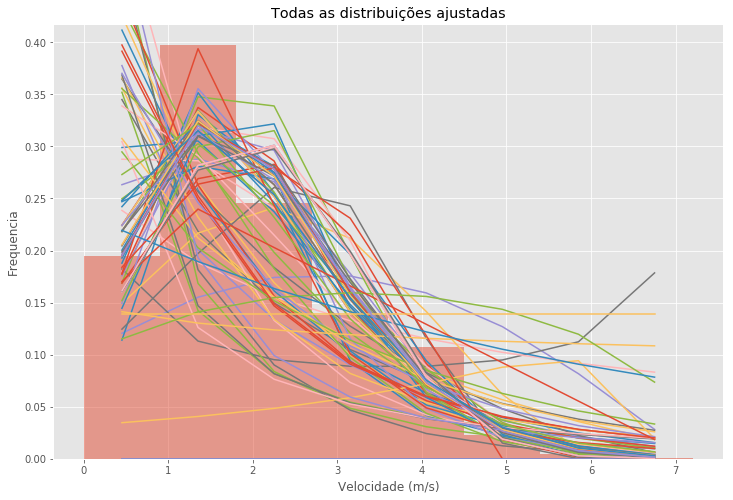

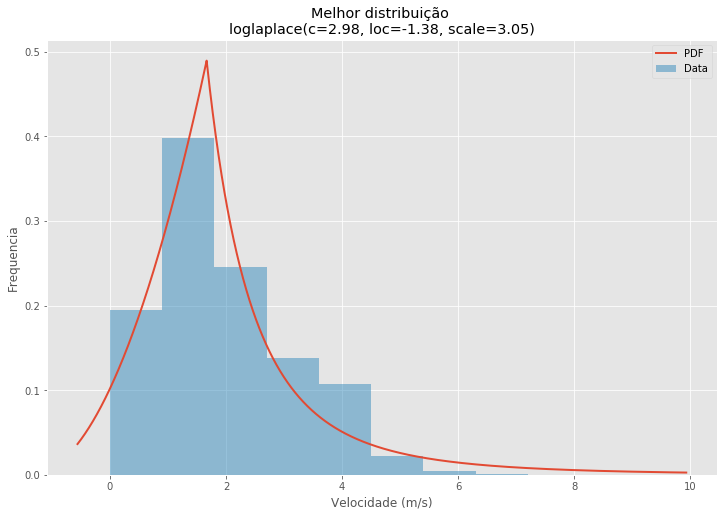

In [38]:
%%time

# Load data from statsmodels datasets
data = df.set_index('data')['vel_m']

# Plot for comparison
plt.figure(figsize=(12,8))
ax = data.plot(kind='hist', bins=8, density=True, alpha=0.5)
# Save plot limits
dataYLim = ax.get_ylim()

# Find best fit distribution
best_fit_name, best_fit_params = best_fit_distribution(data, 8, ax)
best_dist = getattr(st, best_fit_name)

# Update plots
ax.set_ylim(dataYLim)
ax.set_title('Todas as distribuições ajustadas')
ax.set_xlabel('Velocidade (m/s)')
ax.set_ylabel('Frequencia')

# Make PDF with best params 
pdf = make_pdf(best_dist, best_fit_params)

# Display
plt.figure(figsize=(12,8))
ax = pdf.plot(lw=2, label='PDF', legend=True)
p1 = data.plot(kind='hist', bins=8, normed=True, alpha=0.5, label='Data', legend=True, ax=ax)

param_names = (best_dist.shapes + ', loc, scale').split(', ') if best_dist.shapes else ['loc', 'scale']
param_str = ', '.join(['{}={:0.2f}'.format(k,v) for k,v in zip(param_names, best_fit_params)])
dist_str = '{}({})'.format(best_fit_name, param_str)

ax.set_title('Melhor distribuição \n' + dist_str)
ax.set_xlabel('Velocidade (m/s)')
ax.set_ylabel('Frequencia')

In [39]:
df

,data,vel_m,month,year
4344,2001-11-02,2.072000,11,2001
4345,2001-11-03,1.554000,11,2001
4346,2001-11-04,0.345333,11,2001
4347,2001-11-05,1.381333,11,2001
4348,2001-11-06,0.000000,11,2001
4349,2001-11-08,3.108000,11,2001
4350,2001-11-09,2.417333,11,2001
4351,2001-11-10,3.108000,11,2001
4352,2001-11-11,2.417333,11,2001
4353,2001-11-12,1.381333,11,2001
